In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def angular_spectrum_propagation_free_space(U0, wvl, dx, z):
    """
    Propagates an optical field using the Bandlimited Angular Spectrum Method over a range of distances.

    Parameters:
        U0      : 2D numpy array (input wavefield)
        wvl     : float (wavelength of light in meters)
        d_range : list or numpy array (range of propagation distances in meters)
        dx      : float (sampling interval in meters)

    Returns:
        U1  : the propagated field

    Implemented according to: 
    Matsushima, Kyoji, and Tomoyoshi Shimobaba. 
    "Band-limited angular spectrum method for numerical simulation of free-space propagation in far and near fields." 
    Optics express 17.22 (2009): 19662-19673.
    """

    # Get the shape of the original array
    original_height, original_width = U0.shape
    pad_height, pad_width = original_height // 2, original_width // 2
    # Create a new array filled with zeros with the target shape
    U0_padded = np.zeros((original_height + 2 * pad_height, original_width + 2 * pad_width), dtype=U0.dtype)
    # Place the original array in the center of the new array
    U0_padded[pad_height:pad_height + original_height, pad_width:pad_width + original_width] = U0
    
    # Get array size
    ny, nx = U0_padded.shape
    # Wave number
    k = 2 * np.pi / wvl 

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)

    Delta_uy =  1 / (ny * dx)
    Delta_ux =  1 / (nx * dx)
    u_limity = 1 / (np.sqrt((2 * Delta_uy * z)**2 + 1) * wvl)
    u_limitx = 1 / (np.sqrt((2 * Delta_ux * z)**2 + 1) * wvl)
    H_limit = W = ((FY**2 / u_limity**2 + FX**2 * wvl**2) < 1) * ((FX**2 / u_limitx**2 + FY**2 * wvl**2) < 1)
    # Kernel
    H = np.exp(1j * k * z * np.sqrt(0j + 1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))

    # propagate
    U1_padded = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(np.fft.ifftshift(U0_padded)) * H * H_limit))
    # extract to initial size
    U1 = U1_padded[pad_height:pad_height + original_height, pad_width:pad_width + original_width]
          
    return U1


# Speckle creation

Create a field with a random phase with `N=300` data points and a `dx=1000e-9`. Propagate for different distances from `100µm` to `10mm`.
Also change the wavelength from `400nm` to `800nm`.
What do you observe?

Can you quanitify the size of the speckles depending on the physical parameters?

In [43]:
N = 300
dx = 1e-6
field = np.exp(1j * 2 * np.pi * np.random.rand(N, N))

In [56]:
field_prop = angular_spectrum_propagation_free_space(field, 800e-9, 1e-6, 1e-3)

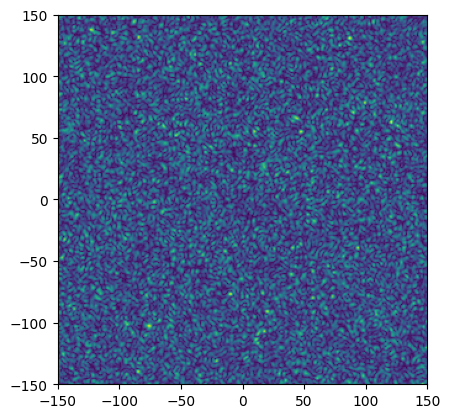

In [57]:
plt.imshow(np.abs(field_prop), extent=(-150, 150,-150, 150))

In [58]:
kx = 2 * np.pi / (2 * dx)
k = 2 * np.pi / 800e-9

In [55]:
np.tan(np.asin(kx / k)) * 5e-3

np.float64(0.002182178902359924)